## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [9]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "1,2"

In [10]:
train, test = keras.datasets.cifar10.load_data()

In [11]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [12]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [13]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 10
BATCH_SIZE = 256
MOMENTUM = [0.5,0.7, 0.9, 0.99]

In [15]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
import itertools
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Momentum = 0.50
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/5

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 114us/step - loss: 2.2268 - accuracy: 0.1583 - val_loss: 2.2794 - val_accuracy: 0.1430
Epoch 2/10
50000/50000 [==============================] - 6s 115us/step - loss: 2.3264 - accuracy: 0.1307 - val_loss: 2.3123 - val_accuracy: 0.1000
Epoch 3/10
50000/50000 [==============================] - 5s 105us/step - loss: 2.3099 - accuracy: 0.0976 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 4/10
50000/50000 [==============================] - 5s 102us/step - loss: 2.3071 - accuracy: 0.0982 - val_loss: 2.3085 - val_accuracy: 0.1000
Epoch 5/10
50000/50000 [==============================] - 5s 97us/step - loss: 2.3073 - accuracy: 0.0997 - val_loss: 2.3053 - val_accuracy: 0.1000
Epoch 6/10
50000/50000 [==============================] - 5s 95us/step - loss: 2.3078 - accuracy: 0.0991 - val_loss: 2.3088 - val_accuracy: 0.1000
Epoch 7/10
50000/50000 [==============================] - 5s 101

50000/50000 [==============================] - 5s 107us/step - loss: 1.5574 - accuracy: 0.4479 - val_loss: 1.6555 - val_accuracy: 0.3984
Epoch 4/10
50000/50000 [==============================] - 5s 106us/step - loss: 1.4954 - accuracy: 0.4715 - val_loss: 1.5274 - val_accuracy: 0.4536
Epoch 5/10
50000/50000 [==============================] - 5s 107us/step - loss: 1.4429 - accuracy: 0.4889 - val_loss: 1.5234 - val_accuracy: 0.4681
Epoch 6/10
50000/50000 [==============================] - 5s 107us/step - loss: 1.4045 - accuracy: 0.5046 - val_loss: 1.4681 - val_accuracy: 0.4829
Epoch 7/10
50000/50000 [==============================] - 6s 111us/step - loss: 1.3687 - accuracy: 0.5135 - val_loss: 1.4588 - val_accuracy: 0.4865
Epoch 8/10
50000/50000 [==============================] - 6s 112us/step - loss: 1.3335 - accuracy: 0.5267 - val_loss: 1.4691 - val_accuracy: 0.4746
Epoch 9/10
50000/50000 [==============================] - 6s 111us/step - loss: 1.2999 - accuracy: 0.5399 - val_loss: 1.897

Epoch 6/10
50000/50000 [==============================] - 5s 108us/step - loss: 1.8176 - accuracy: 0.3653 - val_loss: 1.8075 - val_accuracy: 0.3632
Epoch 7/10
50000/50000 [==============================] - 5s 107us/step - loss: 1.7929 - accuracy: 0.3750 - val_loss: 1.7861 - val_accuracy: 0.3706
Epoch 8/10
50000/50000 [==============================] - 5s 109us/step - loss: 1.7714 - accuracy: 0.3823 - val_loss: 1.7648 - val_accuracy: 0.3813
Epoch 9/10
50000/50000 [==============================] - 5s 108us/step - loss: 1.7532 - accuracy: 0.3879 - val_loss: 1.7469 - val_accuracy: 0.3875
Epoch 10/10
50000/50000 [==============================] - 5s 109us/step - loss: 1.7370 - accuracy: 0.3929 - val_loss: 1.7383 - val_accuracy: 0.3867
Experiment with LR = 0.001000, Momentum = 0.90
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0       

Epoch 9/10
50000/50000 [==============================] - 5s 106us/step - loss: 2.1708 - accuracy: 0.2228 - val_loss: 2.1650 - val_accuracy: 0.2275
Epoch 10/10
50000/50000 [==============================] - 5s 106us/step - loss: 2.1598 - accuracy: 0.2274 - val_loss: 2.1540 - val_accuracy: 0.2327
Experiment with LR = 0.000100, Momentum = 0.70
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 110us/step - loss: 2.3848 - accuracy: 0.1004 - val_loss: 2.3744 - val_accuracy: 0.1015
Epoch 2/10
50000/50000 [==============================] - 5s 107us/step - loss: 2.3677 - accuracy: 0.1007 - val_loss: 2.3591 - val_accuracy: 0.1046
Epoch 3/10
50000/50000 [==============================] - 5s 105us/step - loss: 2.3542 - accuracy: 0.1009 - val_loss: 2.3469 - val_accuracy: 0.1059
Epoch 4/10
50000/50000 [==============================] - 5s 105us/step - loss: 2.3433 - accuracy: 0.1018 - val_loss: 2.3370 - val_accuracy: 0.1072
Epoch 5/10
50000/50000 [==============================] - 5s 104us/step - loss: 2.3344 - accuracy: 0.1039 - val_loss: 2.3288 - val_accuracy: 0.1068
Epoch 6/10
50000/50000 [==============================] - 5s 103us/step - loss: 2.3269 - accuracy: 0.1056 - val_loss: 2.3219 - val_accuracy: 0.1061
Epoch 7/10
50000/50000 [==============================] - 5s 1

50000/50000 [==============================] - 6s 114us/step - loss: 2.1614 - accuracy: 0.2358 - val_loss: 2.1370 - val_accuracy: 0.2509
Epoch 4/10
50000/50000 [==============================] - 6s 113us/step - loss: 2.1155 - accuracy: 0.2556 - val_loss: 2.0951 - val_accuracy: 0.2628
Epoch 5/10
50000/50000 [==============================] - 6s 113us/step - loss: 2.0767 - accuracy: 0.2688 - val_loss: 2.0595 - val_accuracy: 0.2731
Epoch 6/10
50000/50000 [==============================] - 6s 112us/step - loss: 2.0437 - accuracy: 0.2817 - val_loss: 2.0293 - val_accuracy: 0.2871
Epoch 7/10
50000/50000 [==============================] - 6s 111us/step - loss: 2.0153 - accuracy: 0.2909 - val_loss: 2.0028 - val_accuracy: 0.2987
Epoch 8/10
50000/50000 [==============================] - 5s 110us/step - loss: 1.9899 - accuracy: 0.3028 - val_loss: 1.9793 - val_accuracy: 0.3081
Epoch 9/10
50000/50000 [==============================] - 5s 108us/step - loss: 1.9674 - accuracy: 0.3120 - val_loss: 1.958

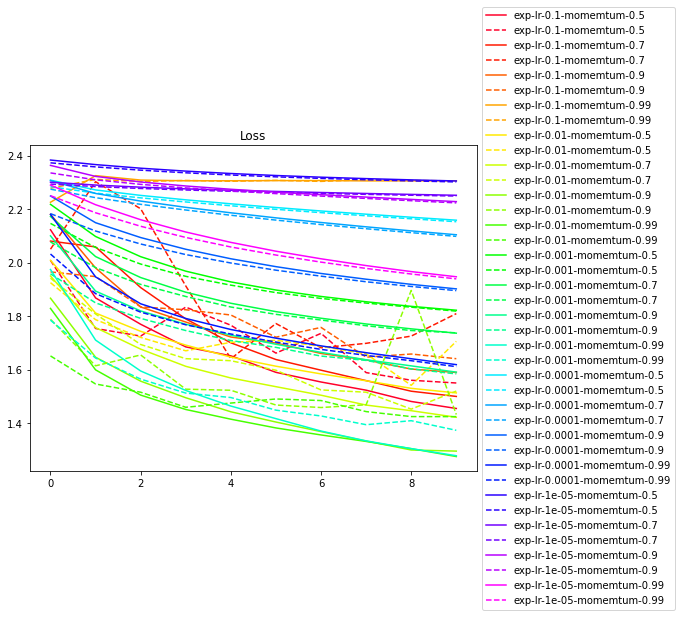

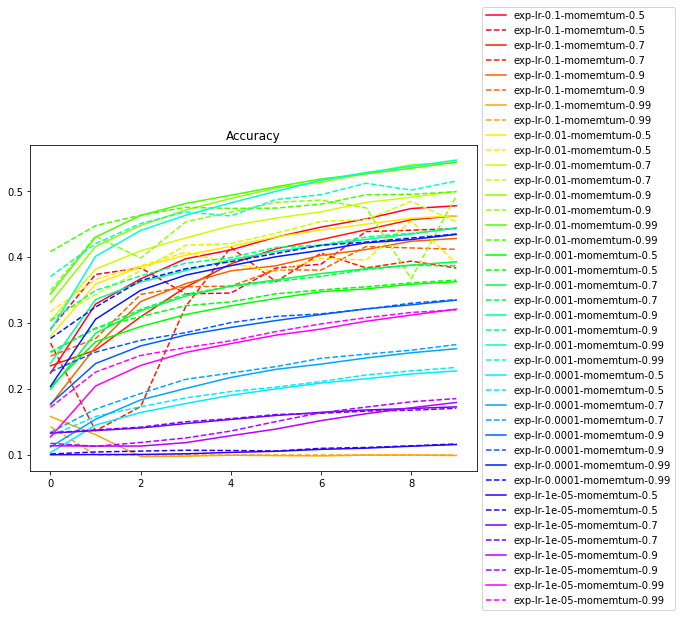

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()